Name: Bessa Tamarra
<br>Chosen Dataset: Heart Failure Clinical Records https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

<h2>Assignment 5</h2>

<h4>Perform regression analysis on your chosen dataset</h4>

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"
heart_data = pd.read_csv(data_url)


X = heart_data[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']]
y = heart_data['DEATH_EVENT']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


degree = 2

poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)


lr_model = LinearRegression()
lr_model.fit(X_train_poly, y_train)
y_pred_lr = lr_model.predict(X_test_poly)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print("Linear Regression:")
print("Mean Squared Error (MSE):", mse_lr)
print("Root Mean Squared Error (RMSE):", rmse_lr)
print("Mean Absolute Error (MAE):", mae_lr)
print()


lasso_model = Lasso(alpha=0.5, max_iter=10000)  # Increase max_iter
lasso_model.fit(X_train_poly, y_train)
y_pred_lasso = lasso_model.predict(X_test_poly)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print("Lasso Regression:")
print("Mean Squared Error (MSE):", mse_lasso)
print("Root Mean Squared Error (RMSE):", rmse_lasso)
print("Mean Absolute Error (MAE):", mae_lasso)
print()


ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train_poly, y_train)
y_pred_ridge = ridge_model.predict(X_test_poly)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print("Ridge Regression:")
print("Mean Squared Error (MSE):", mse_ridge)
print("Root Mean Squared Error (RMSE):", rmse_ridge)
print("Mean Absolute Error (MAE):", mae_ridge)
print()


elasticnet_model = ElasticNet(alpha=0.5, l1_ratio=0.5, max_iter=10000)  # Increase max_iter
elasticnet_model.fit(X_train_poly, y_train)
y_pred_elasticnet = elasticnet_model.predict(X_test_poly)
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
rmse_elasticnet = np.sqrt(mse_elasticnet)
mae_elasticnet = mean_absolute_error(y_test, y_pred_elasticnet)
print("ElasticNet Regression:")
print("Mean Squared Error (MSE):", mse_elasticnet)
print("Root Mean Squared Error (RMSE):", rmse_elasticnet)
print("Mean Absolute Error (MAE):", mae_elasticnet)


Linear Regression:
Mean Squared Error (MSE): 0.5040071030547864
Root Mean Squared Error (RMSE): 0.7099345766018066
Mean Absolute Error (MAE): 0.44461154257023544

Lasso Regression:
Mean Squared Error (MSE): 0.2509195035941175
Root Mean Squared Error (RMSE): 0.5009186596585493
Mean Absolute Error (MAE): 0.3834941376687733

Ridge Regression:
Mean Squared Error (MSE): 0.48468123702306987
Root Mean Squared Error (RMSE): 0.6961905177629683
Mean Absolute Error (MAE): 0.44827686136210043

ElasticNet Regression:
Mean Squared Error (MSE): 0.24925251749783092
Root Mean Squared Error (RMSE): 0.4992519579308938
Mean Absolute Error (MAE): 0.38080309757229086


C:\Users\bessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.644e+01, tolerance: 4.991e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\bessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.46041e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\bessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.631e+01, tolerance: 4.991e-03
  model = cd_fast.

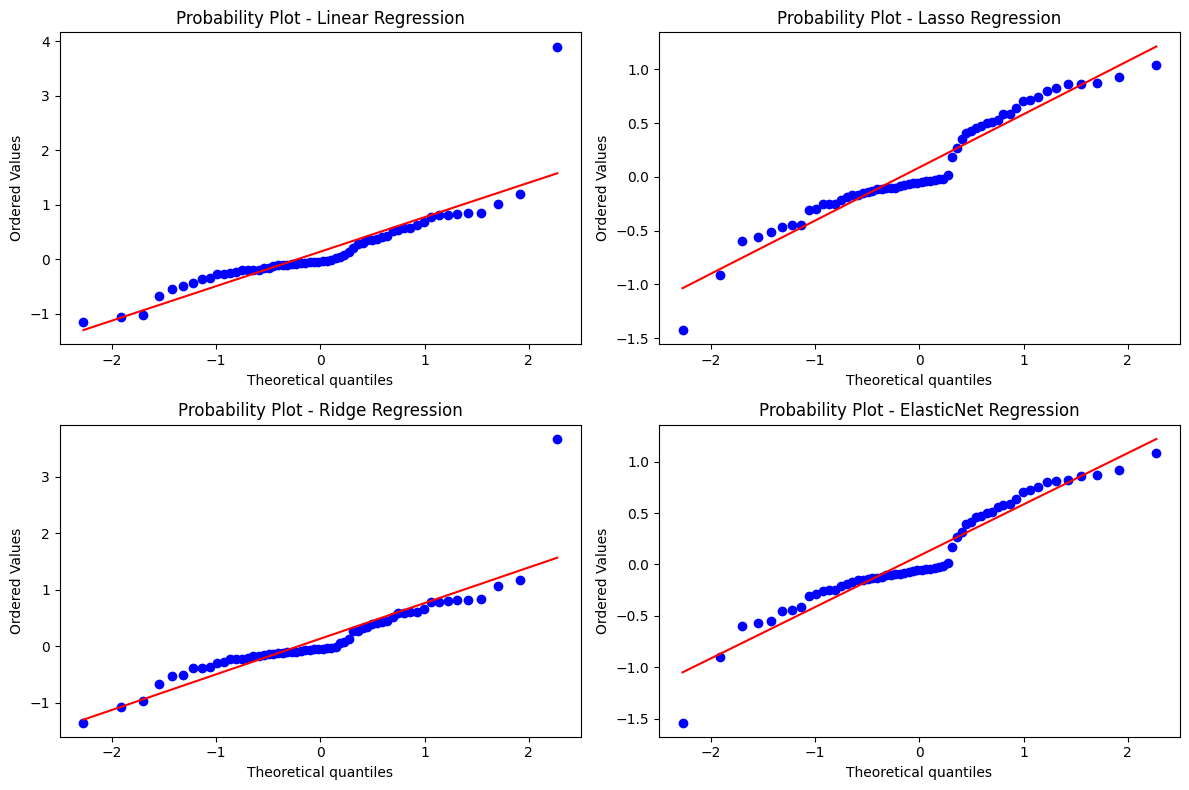

In [28]:
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
stats.probplot(residuals_lr, dist="norm", plot=plt)
plt.title('Probability Plot - Linear Regression')

plt.subplot(2, 2, 2)
stats.probplot(residuals_lasso, dist="norm", plot=plt)
plt.title('Probability Plot - Lasso Regression')

plt.subplot(2, 2, 3)
stats.probplot(residuals_ridge, dist="norm", plot=plt)
plt.title('Probability Plot - Ridge Regression')

plt.subplot(2, 2, 4)
stats.probplot(residuals_elasticnet, dist="norm", plot=plt)
plt.title('Probability Plot - ElasticNet Regression')

plt.tight_layout()
plt.show()


<h4>Logistic Regression Project Exercise</h4>

<p>Exploratory Data Analysis and Visualization</p>

<h5>Visualization Task</h5>

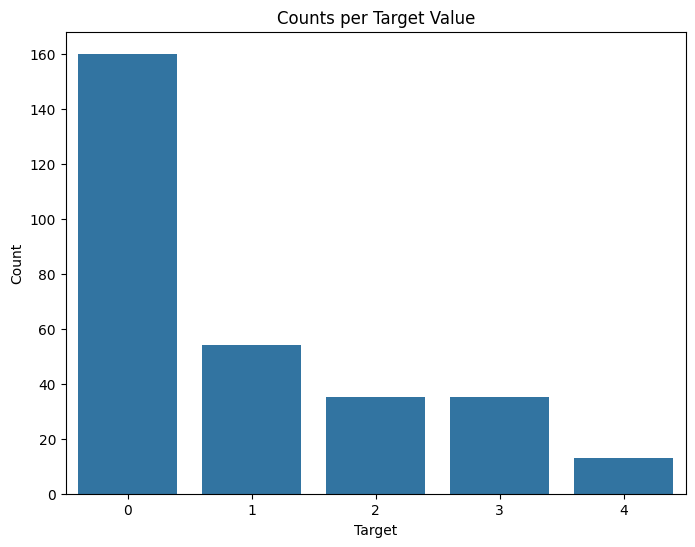

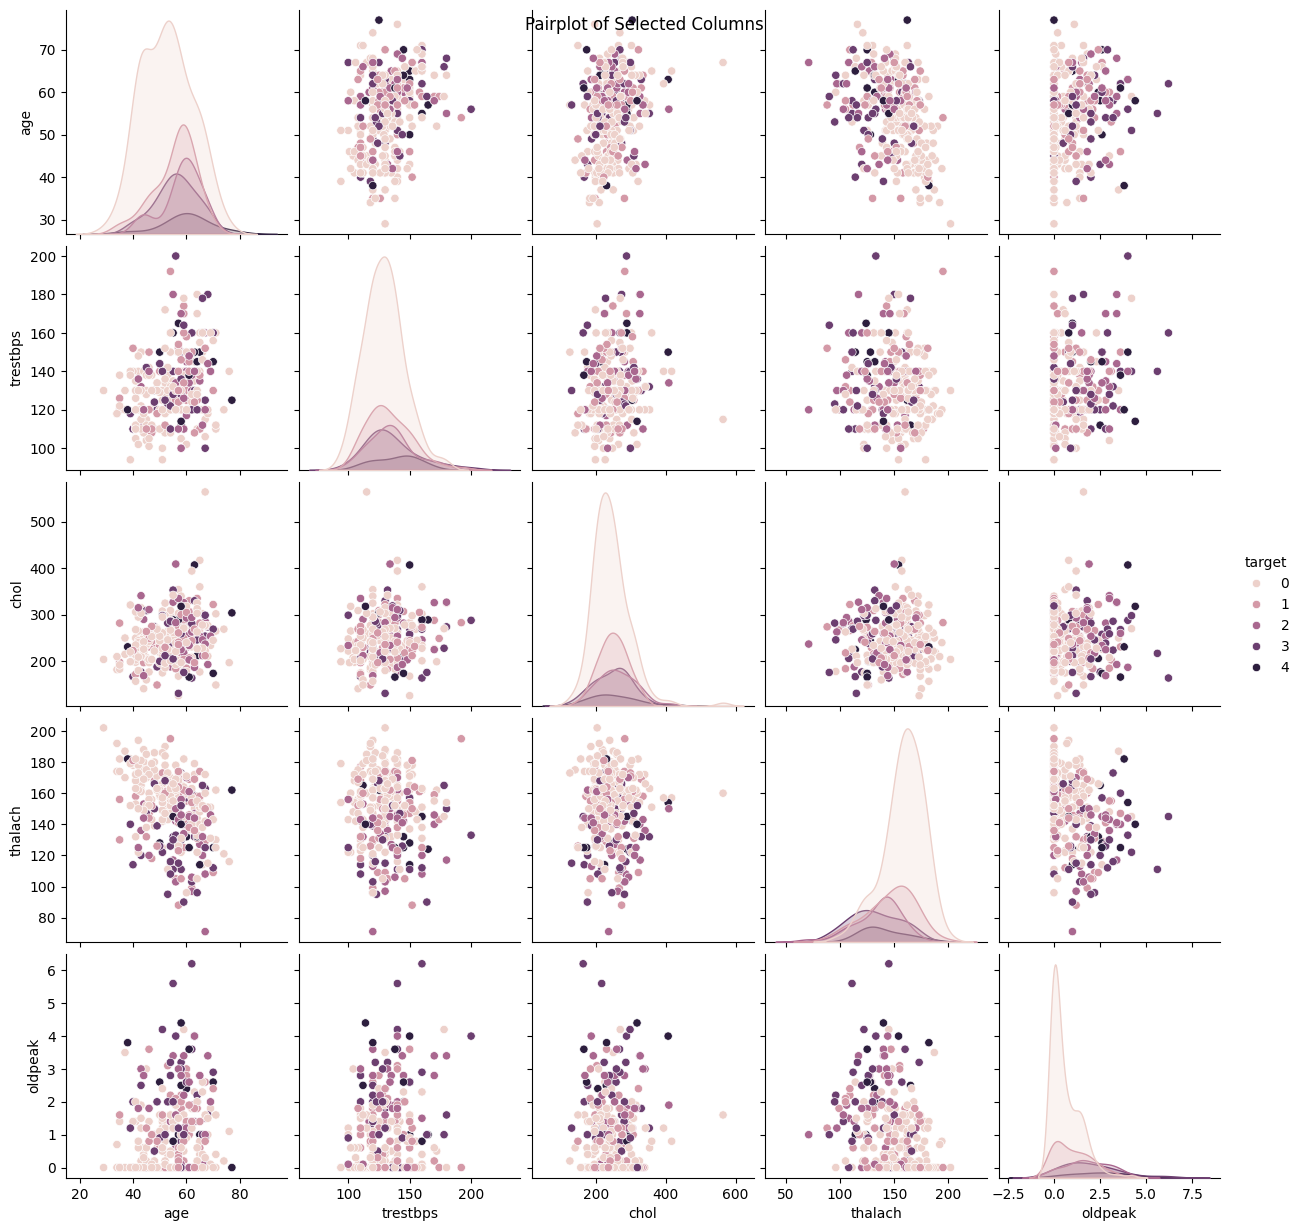

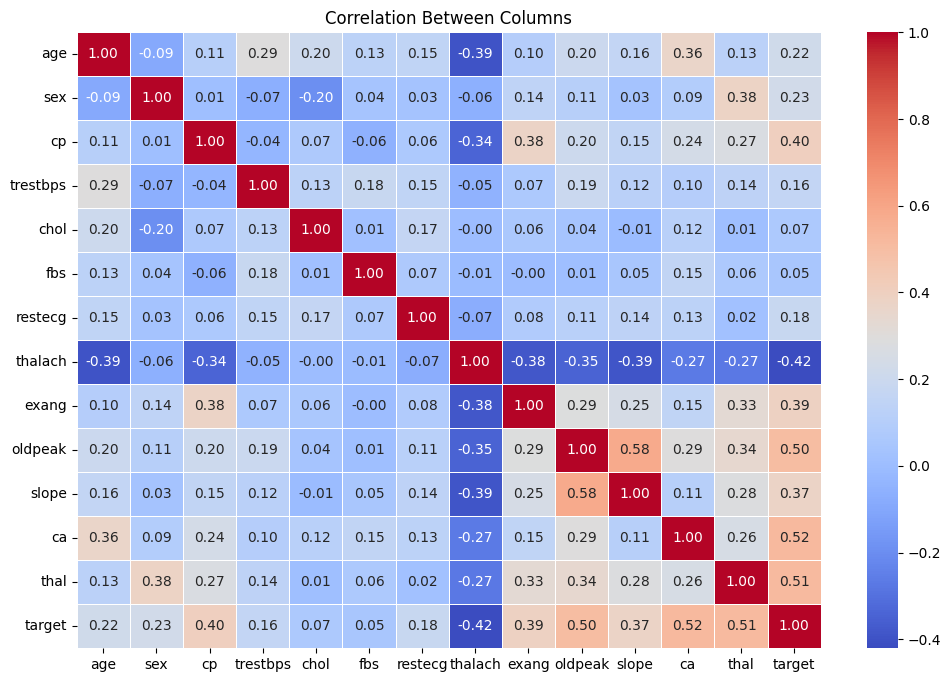

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=names)
data.replace('?', np.nan, inplace=True)

data = data.apply(pd.to_numeric)

data.dropna(inplace=True)

plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=data)
plt.title('Counts per Target Value')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

columns_of_interest = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
sns.pairplot(data[columns_of_interest], hue='target')
plt.suptitle('Pairplot of Selected Columns')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Columns')
plt.show()


The bar plot visualizes the count of each unique value in the target column of the daaset, representing the presence/absence of heart disease. It depicts the number of instances that belong to each category, displaying the distributiong of heart disease cases in the dataset.

The pairplot shows the pairwise relationships between columns in the dataset, namely age, resting blood pressure, serum cholesterol, max heart rate, ST depression and the presence/absence of heart disease. The scatterplot shows use the relationship between two variables, and the diagonal displays their distributions.

The heatmap tells usthe correlation between numeric columns in the dataset, where darker hues indicate stronger correlation.

<h5>Modeling Task</h5>

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('target', axis=1)  # Features
y = data['target']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

logistic_regression = LogisticRegression(max_iter=1000)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found using GridSearchCV:")
print(grid_search.best_params_)

best_logistic_regression = grid_search.best_estimator_

y_pred = best_logistic_regression.predict(X_test_scaled)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred, zero_division=0))


Best parameters found using GridSearchCV:
{'C': 0.1}

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.67      0.50      0.57         4
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1

    accuracy                           0.60        15
   macro avg       0.27      0.28      0.27        15
weighted avg       0.55      0.60      0.57        15



Model Coefficients:
[[-0.07235627 -0.32707763 -0.48551988 -0.26378328 -0.1128413   0.13836736
  -0.19513106  0.35986127 -0.25845008 -0.29448253 -0.22644791 -0.65955262
  -0.50335446]
 [-0.03795282  0.15174779 -0.11850957  0.10394294  0.03121701 -0.26231535
  -0.01084888  0.03968178  0.1010384  -0.21694969 -0.08512414 -0.13467167
  -0.0548025 ]
 [ 0.07335297  0.04561107  0.24462931  0.0016069   0.17082654  0.13744289
  -0.22845371 -0.15201224  0.09328272  0.18197637 -0.00488373  0.0919415
   0.1209948 ]
 [-0.21760185 -0.02184164  0.09882915  0.00457501 -0.08592691  0.13342379
   0.11786088 -0.23561698  0.17978947  0.1576347   0.12462542  0.3474075
   0.28238096]
 [ 0.25455797  0.15156041  0.26057099  0.15365842 -0.00327535 -0.14691868
   0.31657277 -0.01191382 -0.11566051  0.17182115  0.19183036  0.35487529
   0.1547812 ]]


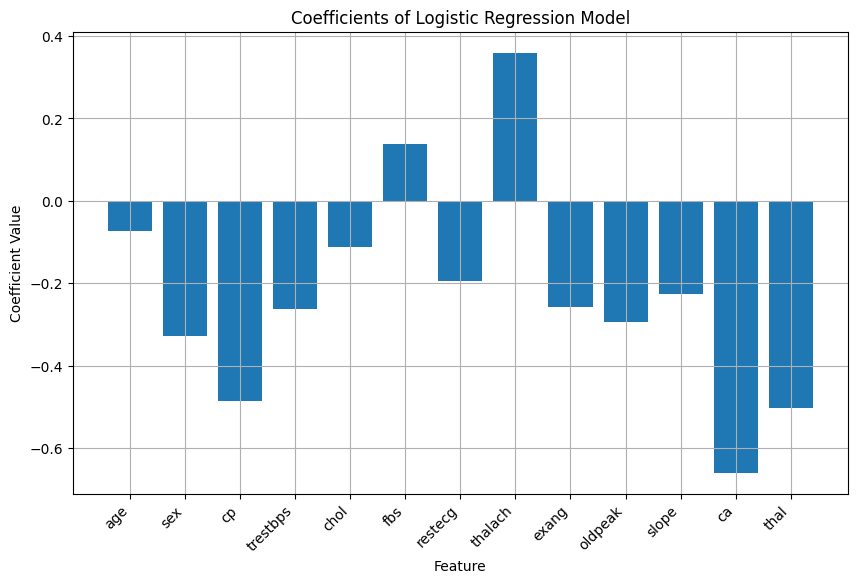

In [8]:

coefficients = best_logistic_regression.coef_
print("Model Coefficients:")
print(coefficients)

plt.figure(figsize=(10, 6))
plt.bar(X.columns, coefficients[0])
plt.title("Coefficients of Logistic Regression Model")
plt.xlabel("Feature")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


Each bar illustrated the coefficient value of a feature. This is to better understand the imppotance of each feature in predicting the target value.

<h4>Model Performance Evaluation</h4>

Confusion Matrix Array:
[[7 1 0 0 0]
 [2 2 0 0 0]
 [0 0 0 1 1]
 [0 0 0 0 0]
 [1 0 0 0 0]]


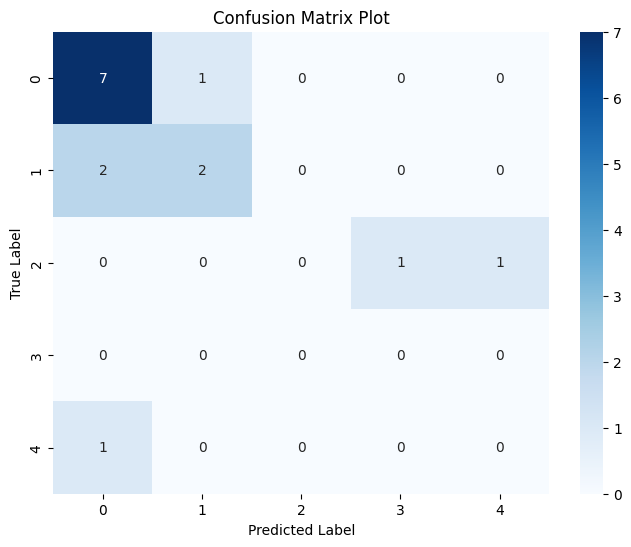


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.67      0.50      0.57         4
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1

    accuracy                           0.60        15
   macro avg       0.27      0.28      0.27        15
weighted avg       0.55      0.60      0.57        15



In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

y_pred_test = best_logistic_regression.predict(X_test_scaled)

conf_matrix_array = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix Array:")
print(conf_matrix_array)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_array, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix Plot')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test, zero_division=0))


<h4>Performance Curves</h4>

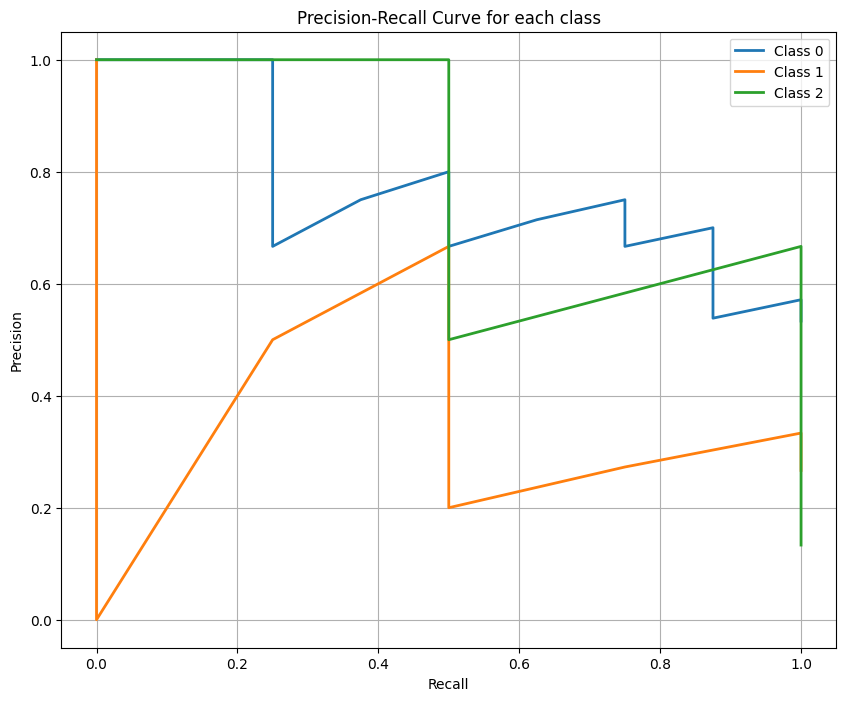

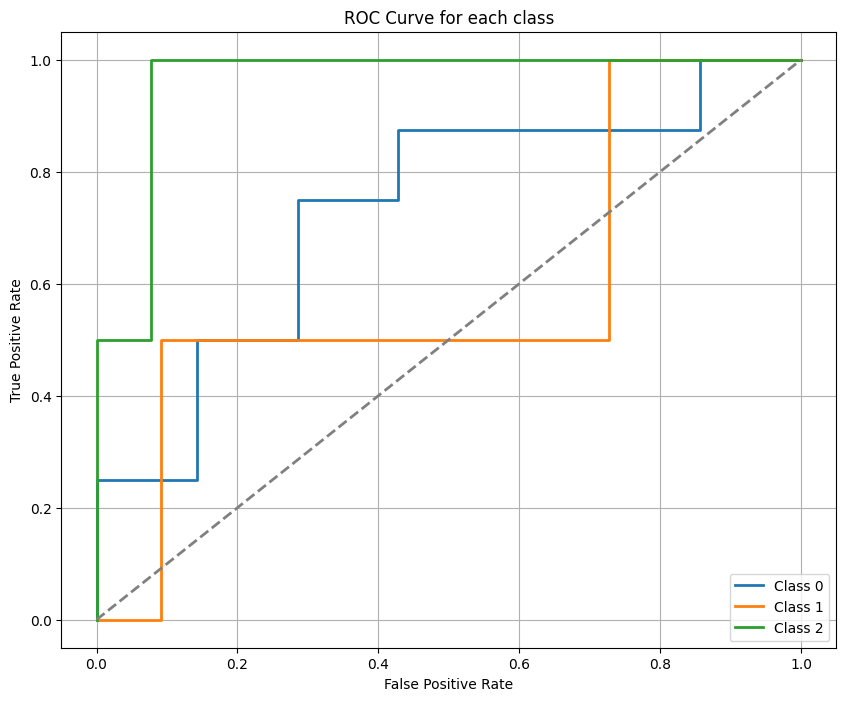

In [15]:

precision_recall_curves = {}
roc_curves = {}


for i in range(len(y_test.unique())):

    if sum(y_test == i) > 0:
        y_test_binary = (y_test == i).astype(int)
        y_pred_prob = best_logistic_regression.predict_proba(X_test_scaled)[:, i]
        precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_prob)
        precision_recall_curves[i] = (precision, recall)
        fpr, tpr, _ = roc_curve(y_test_binary, y_pred_prob)
        roc_curves[i] = (fpr, tpr)


plt.figure(figsize=(10, 8))
for i in range(len(y_test.unique())):
    if i in precision_recall_curves:
        precision, recall = precision_recall_curves[i]
        plt.plot(recall, precision, lw=2, label='Class {}'.format(i))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend(loc='best')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 8))
for i in range(len(y_test.unique())):
    if i in roc_curves:
        fpr, tpr = roc_curves[i]
        plt.plot(fpr, tpr, lw=2, label='Class {}'.format(i))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend(loc='best')
plt.grid(True)
plt.show()
